In [1]:
import importlib
import numpy as np
import hopfieldNetwork as hn
import matplotlib.pyplot as plt

In [2]:
N2 = 1024
log2N2 = int(np.log2(N2))
pictures_patterns = np.loadtxt('pict.dat', delimiter=',')
pictures_patterns = pictures_patterns.reshape((11, 1024))
pictures_patterns.shape

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


(11, 1024)

In [3]:
importlib.reload(hn)
hop_net2 = hn.HopfieldNetwork(pictures_patterns[:3,:])
for i, s in enumerate(hop_net2.states):
    print(i, hop_net2.energy(s))

0 -1473936.0
1 -1398416.0
2 -1497344.0


In [4]:
hop_net2.energy(pictures_patterns[9])

-425964.0

In [5]:
hop_net2.energy(pictures_patterns[10])

-177664.0

Fixed Point found after 8999 iterations!
Convergence towards stored pattern nb 0!
[-1. -1. -1. ... -1. -1. -1.] 



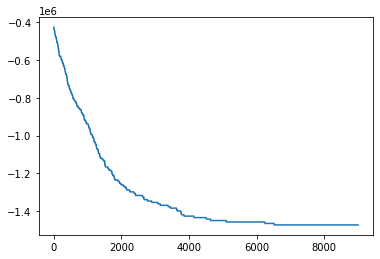

In [6]:
_, _, energy = hop_net2.update_rule(pictures_patterns[9], 9000, sync=False)
plt.plot(range(len(energy)), energy)

In [7]:
### Random weight matrix

In [8]:
hop_net2.W = np.random.normal(0, 1, size=hop_net2.W.shape)

Fixed Point found after 8999 iterations!
This pattern is an attractor!
[-1.  1.  1. ...  1.  1. -1.] 



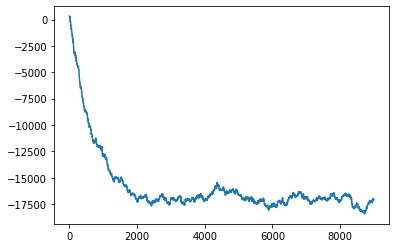

In [9]:
_, _, energy = hop_net2.update_rule(pictures_patterns[9], 9000, sync=False)
plt.plot(range(len(energy)), energy)

In [10]:
### Symmetric weight matrix

In [11]:
W = hop_net2.W.copy()
hop_net2.W = 0.5*(W + W.T) 

Fixed Point found after 8999 iterations!
This pattern is an attractor!
[-1.  1.  1. ... -1. -1.  1.] 



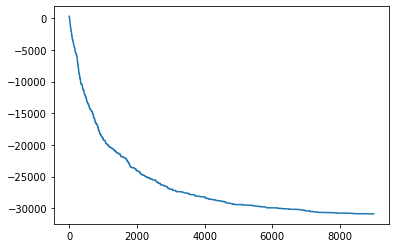

In [12]:
_, _, energy = hop_net2.update_rule(pictures_patterns[9], 9000, sync=False)
plt.plot(range(len(energy)), energy)